# WeatherPy
---
## Step 0: Import Libraries and Generate Random Geographic Coordinates and a List of Cities

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress as lr
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# date
today = pd.to_datetime("today").strftime("%Y-%m-%d")

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the cities names
cities = []
# Create a set of random lat and lng combinations
# 16:593, 17:640, 888:583, 666:597,
np.random.seed(888)
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lats = []
lngs = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)
        lats.append(float(city.lat))
        lngs.append(float(city.lng))
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


['susuman',
 'puerto natales',
 'sinabang',
 'anadyr',
 'puerto ayora',
 'port-aux-francais',
 'yellowknife',
 'wailua homesteads',
 'grytviken',
 'colonia',
 'bethel',
 'margaret river',
 'bredasdorp',
 'albany',
 'isafjordur',
 'jordan',
 'whitehorse',
 'dumka',
 'adamstown',
 'jamestown',
 'minas de marcona',
 'pisco',
 'ocean city',
 'hawaiian paradise park',
 'blackmans bay',
 'west island',
 'port alfred',
 'tiksi',
 'skelleftea',
 'olonkinbyen',
 'uturoa',
 'gizo',
 'banda aceh',
 'waitangi',
 'invercargill',
 'paracuru',
 'palangkaraya',
 'guerrero negro',
 'muscat',
 'iqaluit',
 'taiohae',
 'semera',
 'acapulco de juarez',
 'hoemul-li',
 'udachny',
 'flying fish cove',
 'qaqortoq',
 'atafu village',
 'touros',
 'cargados carajos',
 'yemva',
 'chinde',
 'west bay',
 'papatowai',
 'dudinka',
 'pacific grove',
 'lihue',
 'mount isa',
 'tsiombe',
 'tralee',
 'paita',
 'hasaki',
 'berber',
 'kralendijk',
 'severo-yeniseyskiy',
 'saint-philippe',
 'natal',
 'kpandae',
 'qusmuryn',
 

---
## Step 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL weather for current, forecast for forecast
url = 'https://api.openweathermap.org/data/2.5/weather?'
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f'{url}lat={round(lats[i],2)}&lon={round(lngs[i],2)}&appid={weather_api_key}&units=metric'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_data.append({"City": city_weather['name'],
                          "Lat": lats[i],
                          "Lng": lngs[i],
                          "Max Temp": city_weather['main']["temp_max"],
                          "Humidity": city_weather['main']["humidity"],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})
    except:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting
    time.sleep(1)
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | sinabang
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | jordan
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | dumka
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | minas de marcona
Processing Record 22 of Set 1 | pisco
Processin

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Susuman,62.78075,148.15396,7.67,74,99,1.22,RU,1719658291
1,Puerto Natales,-51.72987,-72.50603,-3.33,93,100,1.43,CL,1719658293
2,Sinabang,2.48030,96.38010,25.83,84,100,1.53,ID,1719658294
3,Anadyr,64.73424,177.51030,6.08,93,20,7.00,RU,1719658295
4,Puerto Ayora,-0.74018,-90.31380,21.17,100,75,3.04,EC,1719658296


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Susuman,62.78075,148.15396,7.67,74,99,1.22,RU,1719658291
1,Puerto Natales,-51.72987,-72.50603,-3.33,93,100,1.43,CL,1719658293
2,Sinabang,2.48030,96.38010,25.83,84,100,1.53,ID,1719658294
3,Anadyr,64.73424,177.51030,6.08,93,20,7.00,RU,1719658295
4,Puerto Ayora,-0.74018,-90.31380,21.17,100,75,3.04,EC,1719658296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

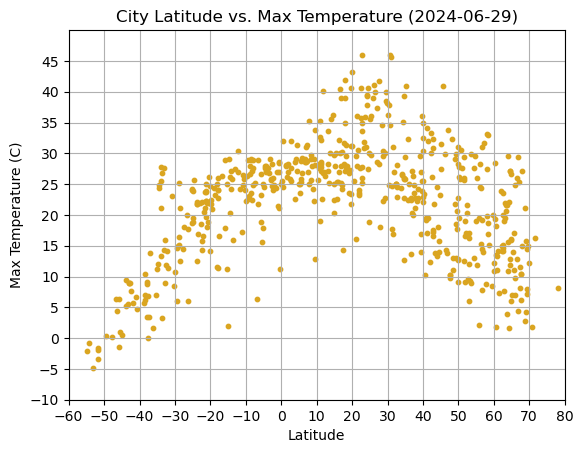

In [172]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat', 'Max Temp', s=10, c='#daa520', xlabel='Latitude', ylabel='Max Temperature (C)',
                          xlim = (-60,80), ylim=(-10,50), xticks=np.arange(-60,90,10), yticks=np.arange(-10,50,5),
                          grid=True, title=f'City Latitude vs. Max Temperature ({today})')
# Save the figure
plt.savefig(f"output_data/Fig1_Temperature_{today}.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

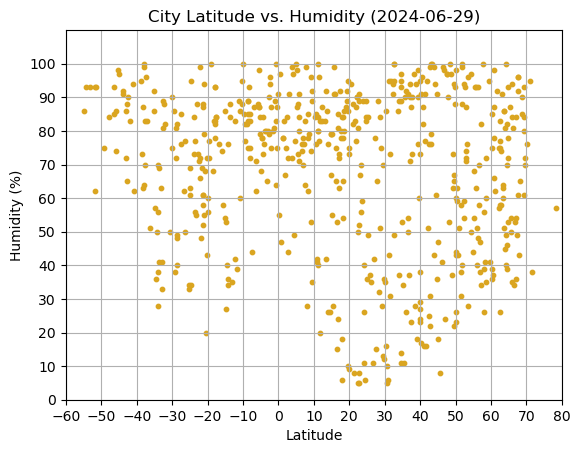

In [173]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity', s=10, c='#daa520', xlabel='Latitude', ylabel='Humidity (%)',
                          xlim = (-60,80), ylim=(0,110), xticks=np.arange(-60,90,10), yticks=np.arange(0,110,10),
                          grid=True, title=f'City Latitude vs. Humidity ({today})')
# Save the figure
plt.savefig(f"output_data/Fig2_Humidity_{today}.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

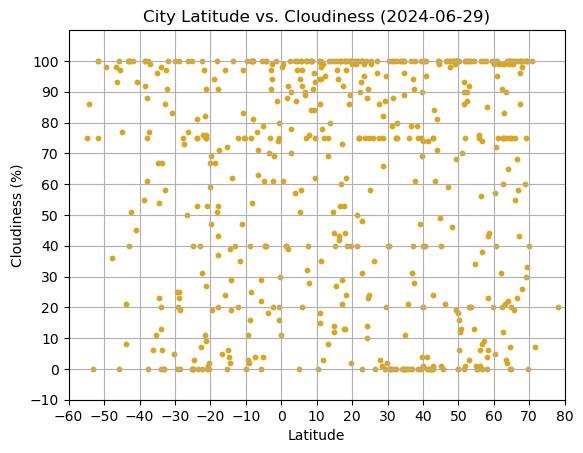

In [242]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness', s=10, c='#daa520', xlabel='Latitude', ylabel='Cloudiness (%)',
                          xlim = (-60,80), ylim=(-10,110), xticks=np.arange(-60,90,10), yticks=np.arange(-10,110,10),
                          grid=True, title=f'City Latitude vs. Cloudiness ({today})')
# Save the figure
plt.savefig(f"output_data/Fig3_Cloudiness_{today}.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

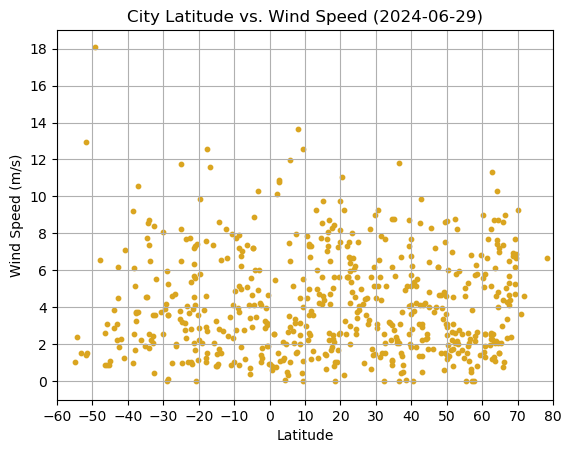

In [175]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed', s=10, c='#daa520', xlabel='Latitude', ylabel='Wind Speed (m/s)',
                          xlim = (-60,80), ylim=(-1,19), xticks=np.arange(-60,90,10), yticks=np.arange(0,20,2),
                          grid=True, title=f'City Latitude vs. Wind Speed ({today})')
# Save the figure
plt.savefig(f"output_data/Fig4_WindSpeed_{today}.png")
# Show plot
plt.show()

---
## Step 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Susuman,62.78075,148.15396,7.67,74,99,1.22,RU,1719658291
2,Sinabang,2.48030,96.38010,25.83,84,100,1.53,ID,1719658294
3,Anadyr,64.73424,177.51030,6.08,93,20,7.00,RU,1719658295
6,Yellowknife,62.45411,-114.37248,14.12,58,20,5.14,CA,1719658299
7,Wailua Homesteads,22.07244,-159.37677,23.26,90,75,5.66,US,1719658300


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Puerto Natales,-51.72987,-72.50603,-3.33,93,100,1.43,CL,1719658293
4,Puerto Ayora,-0.74018,-90.31380,21.17,100,75,3.04,EC,1719658296
5,Port-aux-Français,-49.34916,70.21937,0.35,75,98,18.07,TF,1719658297
8,Grytviken,-54.28111,-36.50920,-0.83,93,86,2.39,GS,1719658301
11,Margaret River,-33.95504,115.07599,13.29,70,98,1.81,AU,1719658305


###  Temperature vs. Latitude Linear Regression Plot

 
Coefficient of Determination (r2): 0.33226744658535334
 


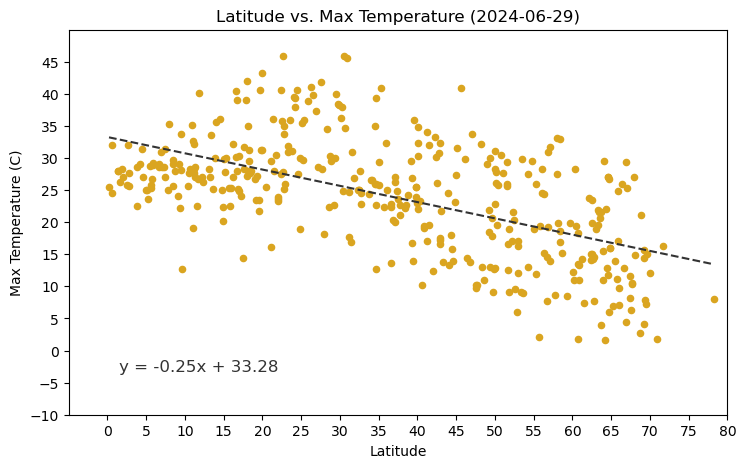

In [222]:
# Linear regression on Northern Hemisphere
m, b, r, p, std_err = lr(northern_df['Lat'],northern_df['Max Temp'])
print(f'Coefficient of Determination (r2): {r**2}')
northern_df.plot.scatter('Lat', 'Max Temp', s=20, c='#daa520', xlabel='Latitude', ylabel='Max Temperature (C)',
                         xlim = (-5,80), ylim=(-10,50), xticks=np.arange(0,90,5), yticks=np.arange(-10,50,5),
                         figsize=(8.5,5), title=f'Latitude vs. Max Temperature ({today})')
x = northern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (1.5,-3.3), fontsize=12, color="#333")
plt.show()

 
Coefficient of Determination (r2): 0.6122257556256212
 


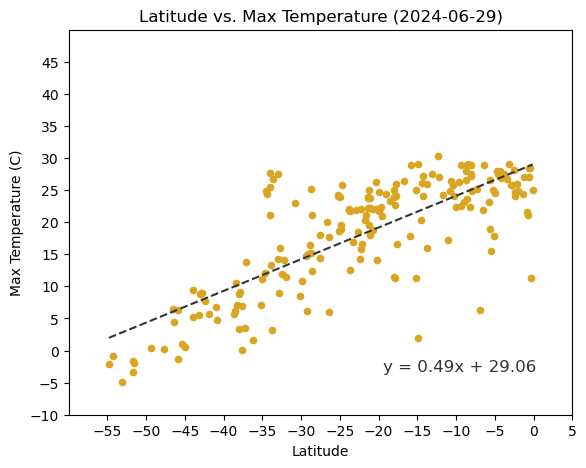

In [223]:
# Linear regression on Southern Hemisphere
m, b, r, p, std_err = lr(southern_df['Lat'],southern_df['Max Temp'])
print(f'Coefficient of Determination (r2): {r**2}')
southern_df.plot.scatter('Lat', 'Max Temp', s=20, c='#daa520', xlabel='Latitude', ylabel='Max Temperature (C)',
                         xlim = (-60,5), ylim=(-10,50), xticks=np.arange(-55,10,5), yticks=np.arange(-10,50,5),
                         figsize=(6.5,5), title=f'Latitude vs. Max Temperature ({today})')
x = southern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (-19.5,-3.3), fontsize=12, color="#333")
plt.show()

**Discussion about the linear relationship:** the max temperature appears to have a linear relationship latitude, but with the data split at the latitude at which the sun is closest to the earth (23°11'N). This is supported by the southern hemisphere having a greater coefficient of determination than the northern hemisphere, and visually inspecting the plot of the northern hemisphere where the peak does appear to be close to the sun's lattitude.

### Humidity vs. Latitude Linear Regression Plot

Coefficient of Determination (r2): 0.0025096513892505115


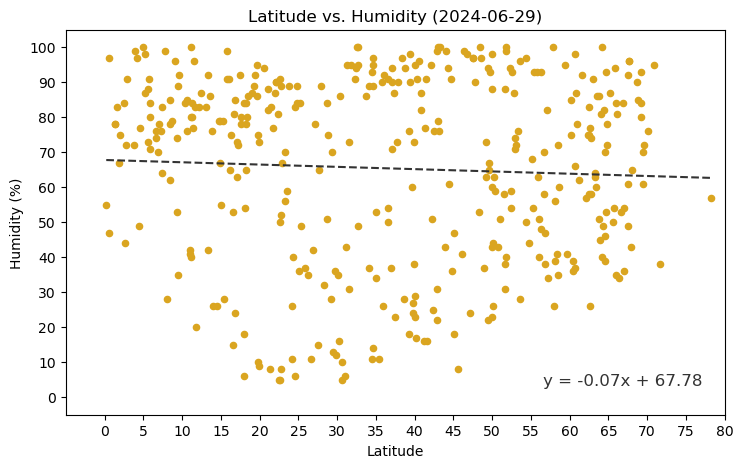

In [240]:
# Northern Hemisphere
m, b, r, p, std_err = lr(northern_df['Lat'],northern_df['Humidity'])
print(f'Coefficient of Determination (r2): {r**2}')
northern_df.plot.scatter('Lat', 'Humidity', s=20, c='#daa520', xlabel='Latitude', ylabel='Humidity (%)',
                         xlim = (-5,80), ylim=(-5,105), xticks=np.arange(0,90,5), yticks=np.arange(0,110,10),
                         figsize=(8.5,5), title=f'Latitude vs. Humidity ({today})')
x = northern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (56.5,3.4), fontsize=12, color="#333")
plt.show()

Coefficient of Determination (r2): 0.0005644364216855032


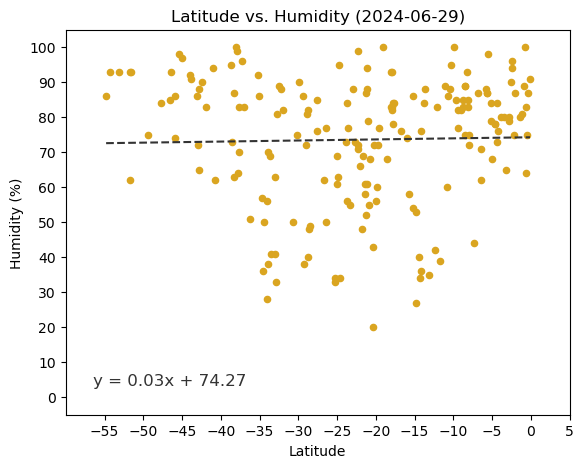

In [239]:
# Southern Hemisphere
m, b, r, p, std_err = lr(southern_df['Lat'],southern_df['Humidity'])
print(f'Coefficient of Determination (r2): {r**2}')
southern_df.plot.scatter('Lat', 'Humidity', s=20, c='#daa520', xlabel='Latitude', ylabel='Humidity (%)',
                         xlim = (-60,5), ylim=(-5,105), xticks=np.arange(-55,10,5), yticks=np.arange(0,110,10),
                         figsize=(6.5,5), title=f'Latitude vs. Humidity ({today})')
x = southern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (-56.5,3.4), fontsize=12, color="#333")
plt.show()

**Discussion about the linear relationship:** humidity doens't appear to have a linear relationship with latitude, however the plots seems to imply a possibility that  humidity in the northern hemisphere is lower than that of the southern hemisphere and that humidity may generally lessen as one gets further away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

Coefficient of Determination (r2): 0.015268014387318339


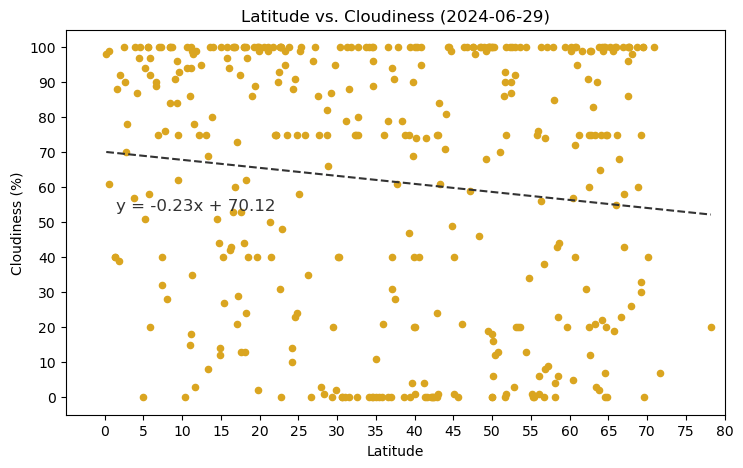

In [238]:
# Northern Hemisphere
m, b, r, p, std_err = lr(northern_df['Lat'],northern_df['Cloudiness'])
print(f'Coefficient of Determination (r2): {r**2}')
northern_df.plot.scatter('Lat', 'Cloudiness', s=20, c='#daa520', xlabel='Latitude', ylabel='Cloudiness (%)',
                         xlim = (-5,80), ylim=(-5,105), xticks=np.arange(0,90,5), yticks=np.arange(0,110,10),
                         figsize=(8.5,5), title=f'Latitude vs. Cloudiness ({today})')
x = northern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (1.5,53.4), fontsize=12, color="#333")
plt.show()

Coefficient of Determination (r2): 0.007759783028948162


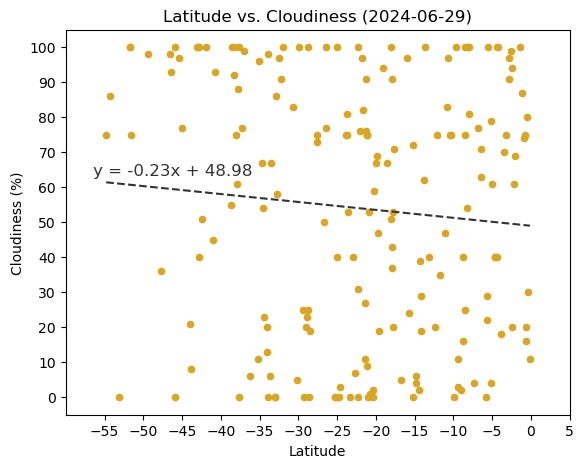

In [237]:
# Southern Hemisphere
m, b, r, p, std_err = lr(southern_df['Lat'],southern_df['Cloudiness'])
print(f'Coefficient of Determination (r2): {r**2}')
southern_df.plot.scatter('Lat', 'Cloudiness', s=20, c='#daa520', xlabel='Latitude', ylabel='Cloudiness (%)',
                         xlim = (-60,5), ylim=(-5,105), xticks=np.arange(-55,10,5), yticks=np.arange(0,110,10),
                         figsize=(6.5,5), title=f'Latitude vs. Cloudiness ({today})')
x = southern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (-56.5,63.4), fontsize=12, color="#333")
plt.show()

**Discussion about the linear relationship:** cloudiness doesn't appear to have a linear relationship with latitude, however the plots seems to imply a possibility that cloudiness may generally lessen as one gets further North, perhaps due the date being closer to the summer solstice in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Coefficient of Determination (r2): 7.015918729381692e-05


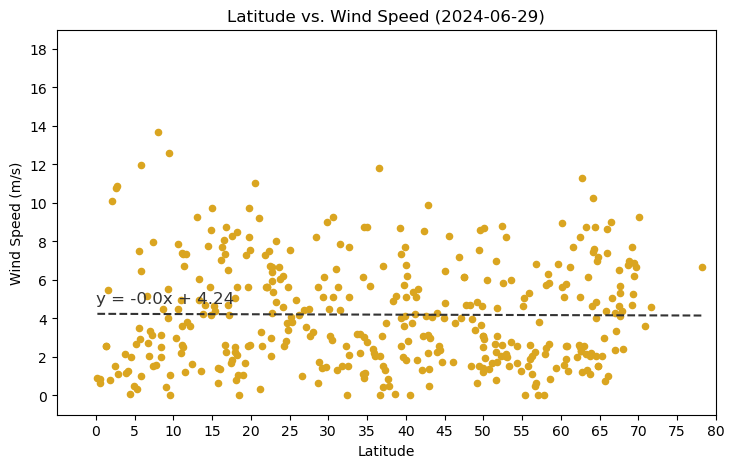

In [235]:
# Northern Hemisphere
m, b, r, p, std_err = lr(northern_df['Lat'],northern_df['Wind Speed'])
print(f'Coefficient of Determination (r2): {r**2}')
northern_df.plot.scatter('Lat', 'Wind Speed', s=20, c='#daa520', xlabel='Latitude', ylabel='Wind Speed (m/s)',
                         xlim = (-5,80), ylim=(-1,19), xticks=np.arange(0,90,5), yticks=np.arange(0,20,2),
                         figsize=(8.5,5), title=f'Latitude vs. Wind Speed ({today})')
x = northern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (0,4.8), fontsize=12, color="#333")
plt.show()

Coefficient of Determination (r2): 4.624253411835028e-06


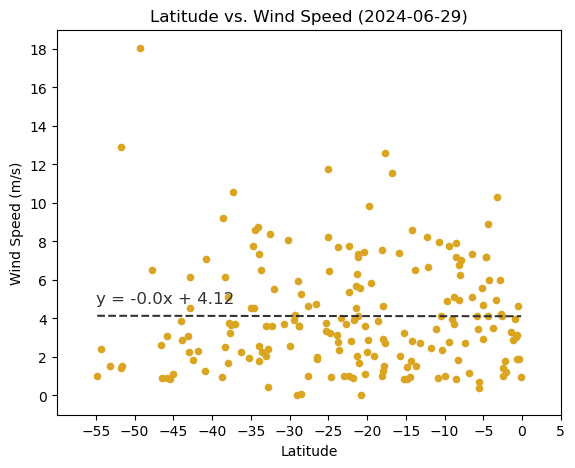

In [243]:
# Southern Hemisphere
m, b, r, p, std_err = lr(southern_df['Lat'],southern_df['Wind Speed'])
print(f'Coefficient of Determination (r2): {r**2}')
southern_df.plot.scatter('Lat', 'Wind Speed', s=20, c='#daa520', xlabel='Latitude', ylabel='Wind Speed (m/s)',
                         xlim = (-60,5), ylim=(-1,19), xticks=np.arange(-55,10,5), yticks=np.arange(0,20,2),
                         figsize=(6.5,5), title=f'Latitude vs. Wind Speed ({today})')
x = southern_df['Lat'].sort_values().unique()
plt.plot(x, m*x+b, color="#333", linestyle='--')
plt.annotate(f"y = {str(round(m,2))}x + {str(round(b,2))}", (-55,4.8), fontsize=12, color="#333")
plt.show()

**Discussion about the linear relationship:** windspeed appears to have no linear relationship to latitude, supported by the slope in both plots being close to zero, with the northern hemisphere having a minisculely higher windspeed.